In [1]:
from Bio import Phylo
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor, DistanceCalculator
from Bio.Align import MultipleSeqAlignment
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df_200 = pd.read_csv('cleaned/200_mn.csv')
df_100 = pd.read_csv('cleaned/100_mn.csv')

In [3]:
df_200['Classification'].unique()

array(['Blautia obeum ATCC 29174 (taxid 411459)',
       'Escherichia coli (taxid 562)',
       'Terrabacteria group (taxid 1783272)', ...,
       'Pseudomonas savastanoi (taxid 29438)',
       'Caproicibacterium sp. BJN0003 (taxid 2994078)',
       'Candidatus Desulforudis audaxviator (taxid 471827)'], dtype=object)

In [4]:
df_200

,type,ID,Classification,sequence_length_x,k-mer_match,id,sequence,quality,sequence_length_y,GC_content
0,C,M01771:9:000000000-L7C7K:1:1105:11060:10482,Blautia obeum ATCC 29174 (taxid 411459),301,131567:3 2:39 186801:41 3085636:5 186801:1 572...,M01771:9:000000000-L7C7K:1:1105:11060:10482 1:...,CCTACGGGAGGCAGCAGTGGGGAATATTGCACAATGGGGGAAACCC...,HHHHHLLLLEKKLLHIKLJLLLLKKLLLLLLLLLLLLLLLLLLLLL...,301,0.551495
1,C,M01771:9:000000000-L7C7K:1:1105:3072:10482,Escherichia coli (taxid 562),301,2:14 0:9 562:16 2:133 131567:5 2:18 131567:8 2...,M01771:9:000000000-L7C7K:1:1105:3072:10482 1:N...,CCTACGGGAGGCAGCAGTGGGGGATATTGCACAATGGGCGCAGGCC...,HHHHHLLLLLLLLLLLLLLLLLLLLKLLLLLLLLLLLLLLLLLLLH...,301,0.548173
2,C,M01771:9:000000000-L7C7K:1:1105:15077:10482,Terrabacteria group (taxid 1783272),301,0:25 2:1 0:101 2:5 1783272:4 2:17 0:5 2:2 0:35...,M01771:9:000000000-L7C7K:1:1105:15077:10482 1:...,AGGACCTACGGGGGGCTGCAGTGGGGAATCTTGGACAATGGGCGAA...,HHHHHLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLL...,301,0.561462
3,C,M01771:9:000000000-L7C7K:1:1105:28470:10482,Segatella copri (taxid 165179),301,0:9 305:1 0:9 2:1 976:5 2:3 976:3 171549:7 171...,M01771:9:000000000-L7C7K:1:1105:28470:10482 1:...,TCCGAACCTACGGGAGGCTGCAGTGAGGAATATTGGTCAATGGGCG...,HHHHHLKKKKLLKLLLIJK<KLHJKLLJE=HJ>KKKJI2HEKHJJH...,301,0.521595
4,C,M01771:9:000000000-L7C7K:1:1105:17443:10482,Segatella copri (taxid 165179),301,0:13 171549:1 976:11 171549:7 171552:5 171549:...,M01771:9:000000000-L7C7K:1:1105:17443:10482 1:...,CCTACGGGAGGCGGCAGTGAGGAATATTGGTCAATGGACGAGAGTC...,HHHHHLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLL...,301,0.511628
...,...,...,...,...,...,...,...,...,...,...
70699,C,M01771:9:000000000-L7C7K:1:1105:22130:13412,Segatella copri (taxid 165179),301,0:2 131567:3 821:3 2:7 171549:5 2:3 909656:43 ...,M01771:9:000000000-L7C7K:1:1105:22130:13412 2:...,TGAGGACTACCGGGGTATCTAATCCTGTTTGATACCCACACTTTCG...,HHHHHLHEKLKLLLLL<JKLLLKLLKKLLLHJLLLLLLLLLHKLLL...,301,0.514950
70700,C,M01771:9:000000000-L7C7K:1:1105:12020:13412,Escherichia coli (taxid 562),301,2:5 562:5 91347:5 1236:2 2:109 1224:5 91347:4 ...,M01771:9:000000000-L7C7K:1:1105:12020:13412 2:...,TGGGGACTACCGGGGTTTCTAATCCTGTTTGCTCCCCACGCTTTCG...,HHHHHKKLLLLLLLLLKLLLLLLLJLLLLLLLLLLLLKHLEAKLJK...,301,0.571429
70701,C,M01771:9:000000000-L7C7K:1:1105:9197:13412,Sodalis ligni (taxid 2697027),301,2:2 2697027:1 0:3 131567:7 2:155 131567:9 2:53...,M01771:9:000000000-L7C7K:1:1105:9197:13412 2:N...,GGGACTACAGGGGTATCTAATCCTGTTTGCTCCCCACGCTTTCGCA...,HHHHHLLLLLLLLLLLLKLLLLLKLLLLKGJLLLLLLLLLILLLJE...,301,0.561462
70702,C,M01771:9:000000000-L7C7K:1:1105:15044:13413,Anaerostipes hadrus (taxid 649756),301,2:4 2697027:1 0:3 131567:7 2:18 186801:2 1239:...,M01771:9:000000000-L7C7K:1:1105:15044:13413 2:...,GAGGGACTACAGGGGTATCTAATCCTGTTTGCTCCCCACGCTTTCG...,HHHHHLKKKLLLLKKLLLLLLLLJKLKKKLLLLLLLLLLLLLLLIK...,301,0.541528


In [5]:
base_genome_data = df_200.iloc[0]

In [6]:
base_genome_data

type                                                                 C
ID                         M01771:9:000000000-L7C7K:1:1105:11060:10482
Classification                 Blautia obeum ATCC 29174 (taxid 411459)
sequence_length_x                                                  301
k-mer_match          131567:3 2:39 186801:41 3085636:5 186801:1 572...
id                   M01771:9:000000000-L7C7K:1:1105:11060:10482 1:...
sequence             CCTACGGGAGGCAGCAGTGGGGAATATTGCACAATGGGGGAAACCC...
quality              HHHHHLLLLEKKLLHIKLJLLLLKKLLLLLLLLLLLLLLLLLLLLL...
sequence_length_y                                                  301
GC_content                                                    0.551495
Name: 0, dtype: object

In [7]:
# Step 1: Define the base genome and evolved species genomes
base_genome = SeqRecord(Seq(base_genome_data['sequence']), id=base_genome_data['ID'], name=base_genome_data['Classification'])  # Base genome (ancestor)

In [8]:
evolved_genomes = [SeqRecord(Seq(df_100.iloc[i]['sequence']), id=df_100.iloc[i]['ID'], name = df_100.iloc[i]['Classification'] ) for i in range(10)]

<Figure size 2000x1200 with 0 Axes>

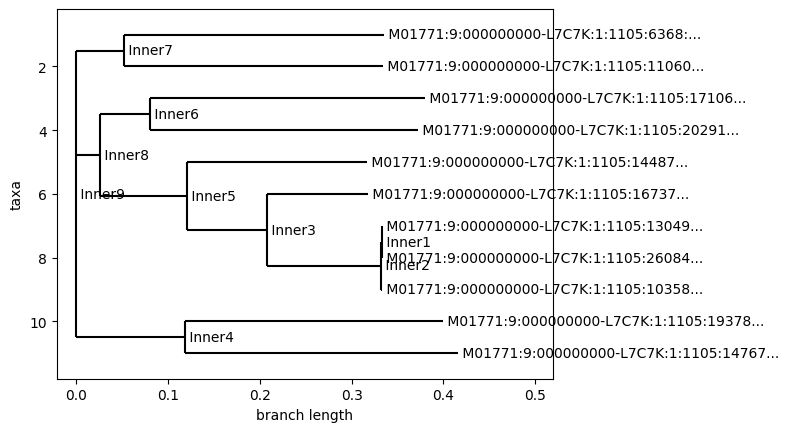

In [13]:
# Combine base genome and evolved genomes into a single list
sequences = [base_genome] + evolved_genomes

# Step 2: Create a Multiple Sequence Alignment
alignment = MultipleSeqAlignment(sequences)

# Step 3: Calculate the Distance Matrix
calculator = DistanceCalculator("identity")
distance_matrix = calculator.get_distance(alignment)

# Step 4: Build the Phylogenetic Tree
constructor = DistanceTreeConstructor()
tree = constructor.nj(distance_matrix)  # Neighbor Joining method

# id_to_name = {seq.id: seq.name for seq in sequences}
# for clade in tree.find_clades():
#     if clade.name in id_to_name:  # Replace id with custom name
#         clade.name = id_to_name[clade.name]

# Step 5: Plot the Phylogenetic Tree
plt.figure(figsize=(20, 12))
Phylo.draw(tree, do_show=False)
plt.show()

In [42]:
# calculate lineage
distance_df = pd.DataFrame(distance_matrix.matrix, index=distance_matrix.names, columns=distance_matrix.names)
pd_series = distance_df.iloc[:,0]
min_index = pd_series[pd_series > 0].idxmin()

In [10]:
base_genome_data['Classification']

'Blautia obeum ATCC 29174 (taxid 411459)'

In [43]:
df_200

,type,ID,Classification,sequence_length_x,k-mer_match,id,sequence,quality,sequence_length_y,GC_content
0,C,M01771:9:000000000-L7C7K:1:1105:11060:10482,Blautia obeum ATCC 29174 (taxid 411459),301,131567:3 2:39 186801:41 3085636:5 186801:1 572...,M01771:9:000000000-L7C7K:1:1105:11060:10482 1:...,CCTACGGGAGGCAGCAGTGGGGAATATTGCACAATGGGGGAAACCC...,HHHHHLLLLEKKLLHIKLJLLLLKKLLLLLLLLLLLLLLLLLLLLL...,301,0.551495
1,C,M01771:9:000000000-L7C7K:1:1105:3072:10482,Escherichia coli (taxid 562),301,2:14 0:9 562:16 2:133 131567:5 2:18 131567:8 2...,M01771:9:000000000-L7C7K:1:1105:3072:10482 1:N...,CCTACGGGAGGCAGCAGTGGGGGATATTGCACAATGGGCGCAGGCC...,HHHHHLLLLLLLLLLLLLLLLLLLLKLLLLLLLLLLLLLLLLLLLH...,301,0.548173
2,C,M01771:9:000000000-L7C7K:1:1105:15077:10482,Terrabacteria group (taxid 1783272),301,0:25 2:1 0:101 2:5 1783272:4 2:17 0:5 2:2 0:35...,M01771:9:000000000-L7C7K:1:1105:15077:10482 1:...,AGGACCTACGGGGGGCTGCAGTGGGGAATCTTGGACAATGGGCGAA...,HHHHHLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLL...,301,0.561462
3,C,M01771:9:000000000-L7C7K:1:1105:28470:10482,Segatella copri (taxid 165179),301,0:9 305:1 0:9 2:1 976:5 2:3 976:3 171549:7 171...,M01771:9:000000000-L7C7K:1:1105:28470:10482 1:...,TCCGAACCTACGGGAGGCTGCAGTGAGGAATATTGGTCAATGGGCG...,HHHHHLKKKKLLKLLLIJK<KLHJKLLJE=HJ>KKKJI2HEKHJJH...,301,0.521595
4,C,M01771:9:000000000-L7C7K:1:1105:17443:10482,Segatella copri (taxid 165179),301,0:13 171549:1 976:11 171549:7 171552:5 171549:...,M01771:9:000000000-L7C7K:1:1105:17443:10482 1:...,CCTACGGGAGGCGGCAGTGAGGAATATTGGTCAATGGACGAGAGTC...,HHHHHLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLL...,301,0.511628
...,...,...,...,...,...,...,...,...,...,...
70699,C,M01771:9:000000000-L7C7K:1:1105:22130:13412,Segatella copri (taxid 165179),301,0:2 131567:3 821:3 2:7 171549:5 2:3 909656:43 ...,M01771:9:000000000-L7C7K:1:1105:22130:13412 2:...,TGAGGACTACCGGGGTATCTAATCCTGTTTGATACCCACACTTTCG...,HHHHHLHEKLKLLLLL<JKLLLKLLKKLLLHJLLLLLLLLLHKLLL...,301,0.514950
70700,C,M01771:9:000000000-L7C7K:1:1105:12020:13412,Escherichia coli (taxid 562),301,2:5 562:5 91347:5 1236:2 2:109 1224:5 91347:4 ...,M01771:9:000000000-L7C7K:1:1105:12020:13412 2:...,TGGGGACTACCGGGGTTTCTAATCCTGTTTGCTCCCCACGCTTTCG...,HHHHHKKLLLLLLLLLKLLLLLLLJLLLLLLLLLLLLKHLEAKLJK...,301,0.571429
70701,C,M01771:9:000000000-L7C7K:1:1105:9197:13412,Sodalis ligni (taxid 2697027),301,2:2 2697027:1 0:3 131567:7 2:155 131567:9 2:53...,M01771:9:000000000-L7C7K:1:1105:9197:13412 2:N...,GGGACTACAGGGGTATCTAATCCTGTTTGCTCCCCACGCTTTCGCA...,HHHHHLLLLLLLLLLLLKLLLLLKLLLLKGJLLLLLLLLLILLLJE...,301,0.561462
70702,C,M01771:9:000000000-L7C7K:1:1105:15044:13413,Anaerostipes hadrus (taxid 649756),301,2:4 2697027:1 0:3 131567:7 2:18 186801:2 1239:...,M01771:9:000000000-L7C7K:1:1105:15044:13413 2:...,GAGGGACTACAGGGGTATCTAATCCTGTTTGCTCCCCACGCTTTCG...,HHHHHLKKKLLLLKKLLLLLLLLJKLKKKLLLLLLLLLLLLLLLIK...,301,0.541528


## Linkage

In [55]:
#clean duplicate
df_100 = df_100.drop_duplicates(subset='ID', keep='first') 
df_200 = df_200.drop_duplicates(subset='ID', keep='first')


In [56]:
evolved_genomes_100 = [SeqRecord(Seq(df_100.iloc[i]['sequence']), id=df_100.iloc[i]['ID']) for i in range(len(df_100))]

In [57]:
def get_linkage_200_100(id, sequence):
    base_genome = SeqRecord(Seq(base_genome_data['sequence']), id=base_genome_data['ID']) 

    # Combine base genome and evolved genomes into a single list
    sequences = [base_genome] + evolved_genomes_100

    # Step 2: Create a Multiple Sequence Alignment
    alignment = MultipleSeqAlignment(sequences)

    # Step 3: Calculate the Distance Matrix
    calculator = DistanceCalculator("identity")
    distance_matrix = calculator.get_distance(alignment)
    distance_df = pd.DataFrame(distance_matrix.matrix, index=distance_matrix.names, columns=distance_matrix.names)
    pd_series = distance_df.iloc[:,0]
    min_index = pd_series[pd_series > 0].idxmin()

    return min_index
    

In [58]:
df_200['link_100'] = df_200.apply(lambda row: get_linkage_200_100(row['ID'], row['sequence']), axis=1)

In [11]:
import numpy as np
min_distance = np.inf
closest_pair = None
for i, sp1 in enumerate(distance_matrix.names):
    for j, sp2 in enumerate(distance_matrix.names):
        if i < j:  # Only consider each pair once
            dist = distance_matrix[sp1, sp2]
            if 0 < dist < min_distance:  # Ignore zero distances (same species)
                min_distance = dist
                closest_pair = (sp1, sp2)

# Display the closest pair and their distance
print(f"The two most related genomes are {closest_pair[0]} and {closest_pair[1]} with a distance of {min_distance:.4f}")

The two most related genomes are M01771:9:000000000-L7C7K:1:1105:10358:6016 and M01771:9:000000000-L7C7K:1:1105:26084:6016 with a distance of 0.0033


In [12]:
min_distance = np.inf
most_related_species = None
base_species_id = base_genome_data['id']
for species_id in distance_matrix.names:
    if species_id != base_species_id:  # Skip comparison with itself
        dist = distance_matrix[base_species_id, species_id]
        if dist < min_distance:
            min_distance = dist
            most_related_species = species_id

# Display the most related species to the base genome and their distance
print(f"The species most related to {base_species_id} is {most_related_species} with a distance of {min_distance:.4f}")

ValueError: Item not found.

In [ ]:
distance_matrix

DistanceMatrix(names=['M01771:9:000000000-L7C7K:1:1105:22891:10482 1:N:0:ATCACGAC+CCTATCCT', 'M01771:9:000000000-L7C7K:1:1105:13357:6016 1:N:0:TCTCGCGC+ATAGAGGC', 'M01771:9:000000000-L7C7K:1:1105:10358:6016 1:N:0:TCTCGCGC+ATAGAGGC', 'M01771:9:000000000-L7C7K:1:1105:26084:6016 1:N:0:TCTCGCGC+ATAGAGGC', 'M01771:9:000000000-L7C7K:1:1105:13049:6016 1:N:0:TCTCGCGC+ATAGAGGC', 'M01771:9:000000000-L7C7K:1:1105:20291:6016 1:N:0:TCTCGCGC+ATAGAGGC', 'M01771:9:000000000-L7C7K:1:1105:15987:6016 1:N:0:TCTCGCGC+ATAGAGGC', 'M01771:9:000000000-L7C7K:1:1105:10312:6016 1:N:0:TCTCGCGC+ATAGAGGC', 'M01771:9:000000000-L7C7K:1:1105:18126:6016 1:N:0:TCTCGCGC+ATAGAGGC', 'M01771:9:000000000-L7C7K:1:1105:23806:6016 1:N:0:TCTCGCGC+ATAGAGGC', 'M01771:9:000000000-L7C7K:1:1105:14487:6016 1:N:0:TCTCGCGC+ATAGAGGC'], matrix=[[0], [0.7541528239202657, 0], [0.5315614617940199, 0.6910299003322259, 0], [0.5282392026578073, 0.6877076411960132, 0.0033222591362126463, 0], [0.5282392026578073, 0.6877076411960132, 0.003322259136

In [ ]:
base_species_id

'M01771:9:000000000-L7C7K:1:1105:22891:10482 1:N:0:ATCACGAC+CCTATCCT'

,M01771:9:000000000-L7C7K:1:1105:11060:10482,M01771:9:000000000-L7C7K:1:1105:10358:6016,M01771:9:000000000-L7C7K:1:1105:26084:6016,M01771:9:000000000-L7C7K:1:1105:13049:6016,M01771:9:000000000-L7C7K:1:1105:20291:6016,M01771:9:000000000-L7C7K:1:1105:14487:6016,M01771:9:000000000-L7C7K:1:1105:17106:6016,M01771:9:000000000-L7C7K:1:1105:6368:6016,M01771:9:000000000-L7C7K:1:1105:16737:6016,M01771:9:000000000-L7C7K:1:1105:14767:6016,M01771:9:000000000-L7C7K:1:1105:19378:6016
M01771:9:000000000-L7C7K:1:1105:11060:10482,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
M01771:9:000000000-L7C7K:1:1105:10358:6016,0.554817,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
M01771:9:000000000-L7C7K:1:1105:26084:6016,0.554817,0.003322,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
M01771:9:000000000-L7C7K:1:1105:13049:6016,0.554817,0.003322,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
M01771:9:000000000-L7C7K:1:1105:20291:6016,0.737542,0.737542,0.737542,0.737542,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
M01771:9:000000000-L7C7K:1:1105:14487:6016,0.734219,0.445183,0.445183,0.445183,0.534884,0.000000,NaN,NaN,NaN,NaN,NaN
M01771:9:000000000-L7C7K:1:1105:17106:6016,0.757475,0.740864,0.740864,0.740864,0.591362,0.568106,0.000000,NaN,NaN,NaN,NaN
M01771:9:000000000-L7C7K:1:1105:6368:6016,0.564784,0.604651,0.604651,0.604651,0.707641,0.691030,0.720930,0.000000,NaN,NaN,NaN
M01771:9:000000000-L7C7K:1:1105:16737:6016,0.481728,0.235880,0.235880,0.235880,0.734219,0.355482,0.740864,0.598007,0.000000,NaN,NaN
M01771:9:000000000-L7C7K:1:1105:14767:6016,0.757475,0.730897,0.734219,0.734219,0.780731,0.754153,0.760797,0.754153,0.764120,0.000000,NaN


[SeqRecord(seq=Seq('CCTACGGGAGGCAGCAGTGGGGAATATTGCACAATGGGGGAAACCCTGATGCAG...GAG'), id='M01771:9:000000000-L7C7K:1:1105:11060:10482', name='Blautia obeum ATCC 29174 (taxid 411459)', description='<unknown description>', dbxrefs=[]),
 SeqRecord(seq=Seq('CCTACGGGAGGCAGCAGTAGGGAATTTTGCGCAATGGGCGAAAGCCTGACGCAG...AGA'), id='M01771:9:000000000-L7C7K:1:1105:10358:6016', name='Rubrobacter xylanophilus (taxid 49319)', description='<unknown description>', dbxrefs=[]),
 SeqRecord(seq=Seq('CCTACGGGAGGCAGCAGTAGGGAATTTTGCGCAATGGGCGAAAGCCTGACGCAG...AGA'), id='M01771:9:000000000-L7C7K:1:1105:26084:6016', name='Rubrobacter xylanophilus (taxid 49319)', description='<unknown description>', dbxrefs=[]),
 SeqRecord(seq=Seq('CCTACGGGAGGCAGCAGTAGGGAATTTTGCGCAATGGGCGAAAGCCTGACGCAG...AGA'), id='M01771:9:000000000-L7C7K:1:1105:13049:6016', name='Rubrobacter xylanophilus (taxid 49319)', description='<unknown description>', dbxrefs=[]),
 SeqRecord(seq=Seq('ACCTACGGGTGGCTGCAGTGGGGAATATTGCACAATGGGCGAAAGCCTGATGCA...A

In [40]:
min_index

'M01771:9:000000000-L7C7K:1:1105:16737:6016'

In [ ]:
min_index = df[df['column_name'] > 0]['column_name'].idxmin()

In [32]:
#Find the closest neighbour
distance_df.iloc[1:,0].idxmin()

'M01771:9:000000000-L7C7K:1:1105:16737:6016'